<a href="https://colab.research.google.com/github/RuthStowers/MAT421/blob/main/Module_H_22_4%2C_22_5%2C_22_6_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module H: 22.4 - Numerical Error and Instability**

There are two main issues to consider with regard to integration schemes for ODEs: *accuracy* and *stability*.

**Accuracy** is a model’s ability to get close to the exact solution.

**Stability** is its ability to keep the error from growing as it integrates forward in time.

*Example*
To illustrate issues of stability, we numerically solve the pendulum equation using the Euler Explicit, Euler Implicit, and Trapezoidal Formulas.

T=2pisqrt(L/g)

We will solve the equation over the time interval [0,5] in increments of 0.1 and for an initial solution of S0 = [0 1]. Where sqrt(g/L) = 6.


<ipython-input-4-b2aa31a0a861>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


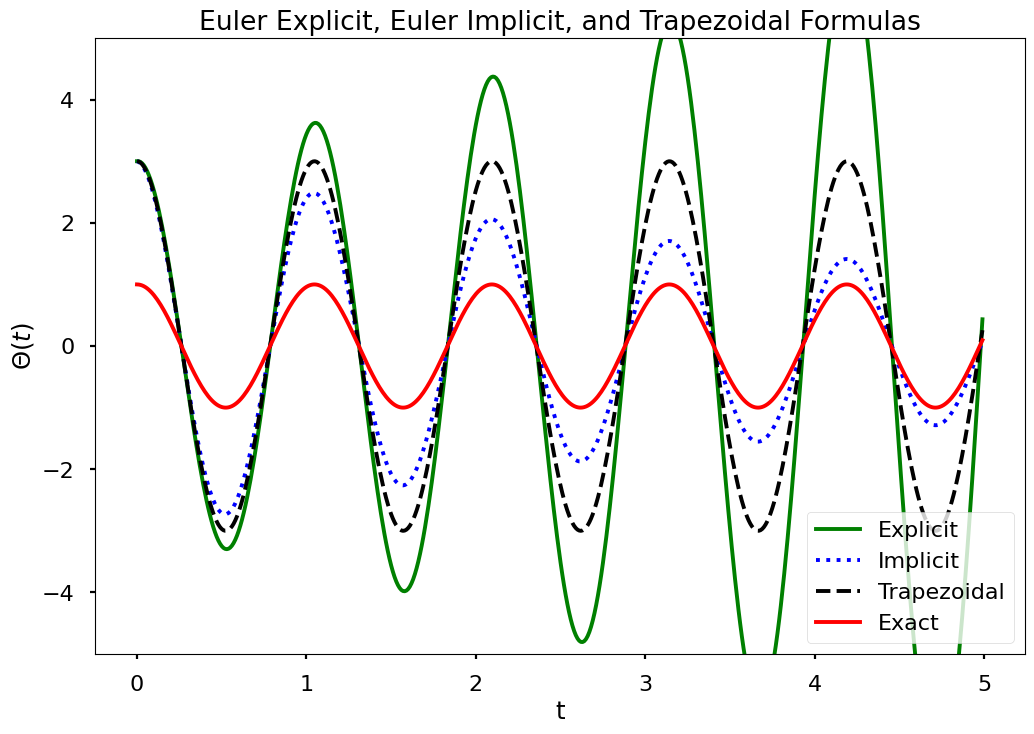

In [4]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 


h1 = 0.01

t = np.arange(0, 5, h1)

w2 = 6

s0 = np.array([[3], [0]])

me = np.array([[1, h1], 
               [-w2**2*h1, 1]])
mi = inv(np.array([[1, -h1], 
               [w2**2*h1, 1]]))
mt = np.dot(inv(np.array([[1, -h1/2], 
    [w2**2*h1/2,1]])), np.array(
      [[1,h1/2], [-w2**2*h1/2, 1]]))

se = np.zeros((len(t), 2))

si = np.zeros((len(t), 2))

st = np.zeros((len(t), 2))


se[0, :] = s0.T
si[0, :] = s0.T
st[0, :] = s0.T

for j in range(0, len(t)-1):
    se[j+1, :] = np.dot(me,se[j, :])
    si[j+1, :] = np.dot(mi,si[j, :])
    st[j+1, :] = np.dot(mt,st[j, :])
    
plt.figure(figsize = (12, 8))
plt.title("Euler Explicit, Euler Implicit, and Trapezoidal Formulas")
plt.plot(t,se[:,0],'g-')
plt.plot(t,si[:,0],'b:')
plt.plot(t,st[:,0],'k--')
plt.plot(t, np.cos(w2*t), 'r')
plt.ylim([-5, 5])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()


**22.5 - Predictor-Corrector Methods and Runge Kutta Methods**

Predictor-Corrector Methods of solving initial value problems improve the accuracy of non-predictor-corrector methods. Essentially it uses two formulas, the predictor and corrector. 

Runge Kutta methods are based on truncated Tayor series.

**22.6 Python ODE Solvers**

There are many built-in functions for solving ODEs in Python. 

One is shown in the example below.



<ipython-input-2-effa116fe9ba>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


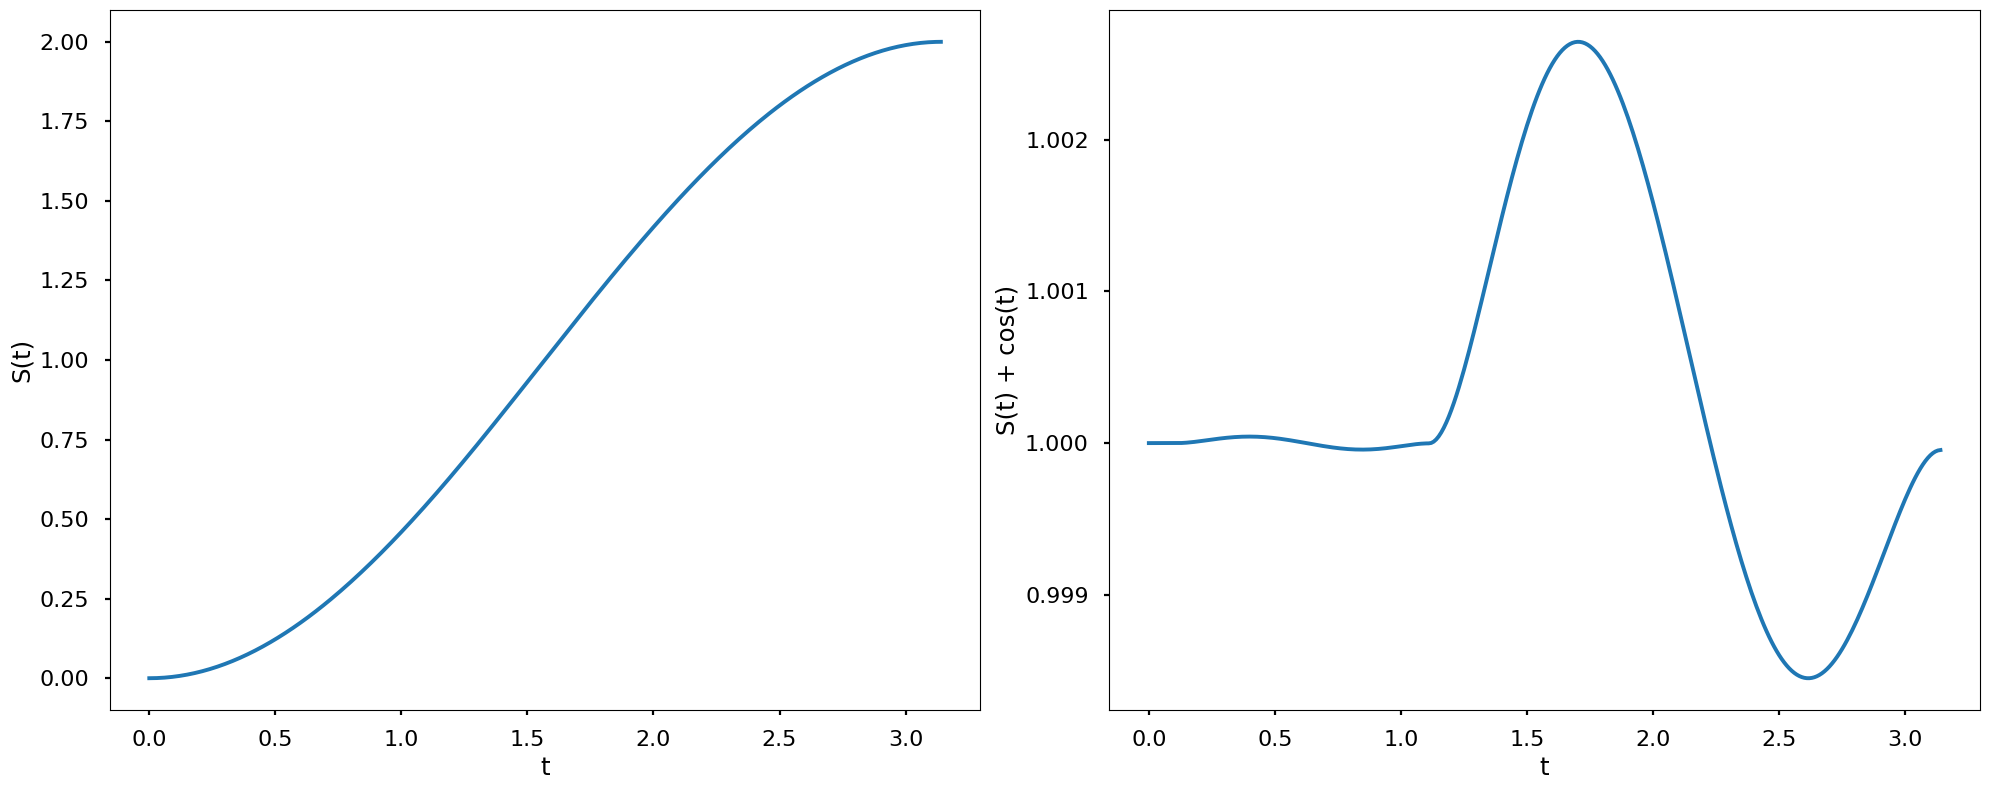

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

Fx = lambda t, st: np.sin(t)

t_eval = np.arange(0, np.pi, 0.01)
sol = solve_ivp(Fx, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] + np.cos(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) + cos(t)')
plt.tight_layout()
plt.show()

The right figure computes the difference between the solution of the integration by solve_ivp and the evalution of the analytical solution to this ODE. As can be seen from the figure, the difference between the approximate and exact solution to this ODE is small.